Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

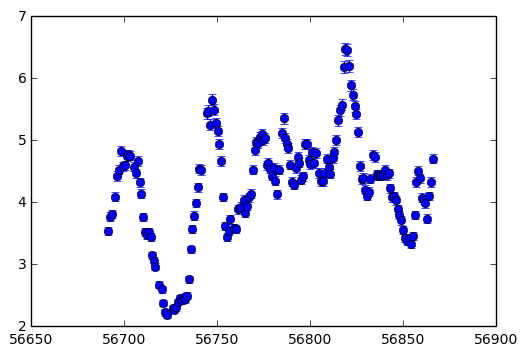

In [17]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

from scipy.stats import norm
from scipy.stats import lognorm

ref_file="lc/1367A.lc"
echo_file="lc/1928A.lc"


dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqL




array([ 0.005     ,  0.01861938,  0.04473305,  0.06933623,  0.10747115,
        0.16658029,  0.25819945,  0.40020915,  0.62032418])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 5.077e+01 inf -- -5.530e+02 -- 1 1 1 1 1 1 1 1
   2 7.674e-01 5.065e+01 8.300e+01 -- -4.700e+02 -- 0.653018 0.587019 0.568277 0.567457 0.566281 0.566085 0.565773 0.566163
   3 3.298e+00 5.043e+01 8.075e+01 -- -3.893e+02 -- 0.414806 0.209135 0.141159 0.13784 0.133393 0.132728 0.131612 0.132761
   4 1.572e+00 5.010e+01 7.754e+01 -- -3.117e+02 -- 0.322539 -0.0834456 -0.273066 -0.284295 -0.297612 -0.299435 -0.302479 -0.300412
   5 5.908e-01 4.964e+01 7.386e+01 -- -2.379e+02 -- 0.302357 -0.214604 -0.654658 -0.688754 -0.723838 -0.729279 -0.736418 -0.733888
   6 3.713e-01 4.877e+01 6.953e+01 -- -1.683e+02 -- 0.284419 -0.200357 -0.96379 -1.05472 -1.13798 -1.15477 -1.17031 -1.16748
   7 2.709e-01 4.671e+01 6.269e+01 -- -1.056e+02 -- 0.277768 -0.185001 -1.13047 -1.34026 -1.52128 -1.56845 -1.6043 -1.60101
   8 2.135e-01 4.361e+01 5.281e+01 -- -5.282e+01 -- 0.277012 -0.185189 -1.16375 -1.49463 -1.83211 -1.9477 -2.03737 -2.03476
   9 1.764e-01 3.767e+01 4.019e+01 -- -1.264e+01 -- 0.2

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.480e+01 3.006e-01 5.395e-01 0.891 +++
+++ 3.525e+01 3.431e+01 3.006e-01 6.590e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.006e-01 5.993e-01 1.34 +++
+++ 3.525e+01 3.469e+01 3.006e-01 5.694e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.006e-01 5.545e-01 0.997 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.781e-01 2.430e-02 0.973 +++
+++ 3.525e+01 3.421e+01 -1.781e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.781e-01 7.491e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.781e-01 4.961e-02 1.21 +++
+++ 3.525e+01 3.470e+01 -1.781e-01 3.696e-02 1.09 +++
+++ 3.525e+01 3.473e+01 -1.781e-01 3.063e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.781e-01 2.747e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.074e+00 0.276 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.598 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.870e-01 0.8 +++
+++ 3.525e+01 3.479e+01 -1.191e+00 -9.725e-01 0.91 +++
+++ 3.525e+01 3.476e+01 -1.191e+00 -9.652e-01 0.96

<Container object of 3 artists>

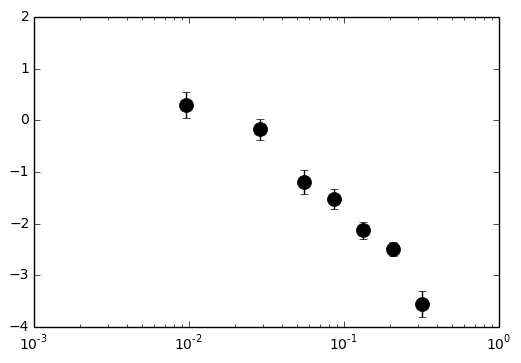

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

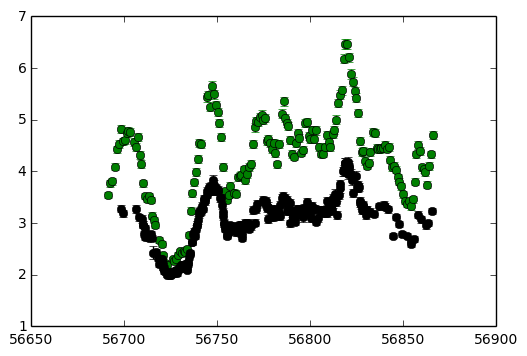

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.344e-01 7.393e+01 inf -- -3.944e+02 -- 1 1 1 1 1 1 1 1
   2 7.685e-01 7.351e+01 8.622e+01 -- -3.082e+02 -- 0.624092 0.584331 0.567607 0.567004 0.567011 0.567373 0.565602 0.572165
   3 3.322e+00 7.320e+01 8.468e+01 -- -2.235e+02 -- 0.335696 0.192847 0.135867 0.134225 0.133328 0.135054 0.130916 0.142995
   4 1.578e+00 7.233e+01 8.258e+01 -- -1.409e+02 -- 0.188517 -0.142584 -0.293749 -0.297289 -0.300771 -0.296754 -0.30398 -0.289444
   5 6.020e-01 7.051e+01 7.959e+01 -- -6.131e+01 -- 0.148668 -0.367563 -0.714785 -0.72349 -0.733746 -0.726833 -0.738389 -0.724505
   6 3.768e-01 6.774e+01 7.540e+01 -- 1.409e+01 -- 0.144731 -0.462001 -1.10711 -1.13381 -1.16285 -1.15289 -1.1711 -1.16069
   7 2.756e-01 6.360e+01 6.924e+01 -- 8.333e+01 -- 0.174356 -0.494567 -1.42737 -1.5044 -1.58181 -1.57067 -1.60086 -1.59803
   8 2.179e-01 5.635e+01 5.976e+01 -- 1.431e+02 -- 0.217323 -0.511297 -1.61338 -1.7878 -1.97301 -1.97114 -2.02736 -2.03849
   9 1.801e-01 4.421e+01 4.621e+01 -- 1.893e+02 -- 0.246071 -

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 2.470e+02 2.466e+02 2.658e-01 5.023e-01 0.855 +++
+++ 2.470e+02 2.461e+02 2.658e-01 6.206e-01 1.8 +++
+++ 2.470e+02 2.463e+02 2.658e-01 5.615e-01 1.29 +++
+++ 2.470e+02 2.465e+02 2.658e-01 5.319e-01 1.06 +++
+++ 2.470e+02 2.465e+02 2.658e-01 5.171e-01 0.957 +++
+++ 2.470e+02 2.465e+02 2.658e-01 5.245e-01 1.01 +++
+++ 2.470e+02 2.465e+02 2.658e-01 5.208e-01 0.983 +++
+++ 2.470e+02 2.465e+02 2.658e-01 5.226e-01 0.997 +++
	### errors for param 1 ###
+++ 2.470e+02 2.465e+02 -5.419e-01 -3.317e-01 0.963 +++
+++ 2.470e+02 2.460e+02 -5.419e-01 -2.266e-01 2.03 +++
+++ 2.470e+02 2.463e+02 -5.419e-01 -2.792e-01 1.46 +++
+++ 2.470e+02 2.464e+02 -5.419e-01 -3.054e-01 1.2 +++
+++ 2.470e+02 2.464e+02 -5.419e-01 -3.186e-01 1.08 +++
+++ 2.470e+02 2.465e+02 -5.419e-01 -3.251e-01 1.02 +++
+++ 2.470e+02 2.465e+02 -5.419e-01 -3.284e-01 0.991 +++
	### errors for param 2 ###
+++ 2.470e+02 2.468e+02 -1.724e+00 -1.596e+00 0.302 +++
+++ 2.470e+02 2.467e+02 -1.724e+00 -1.532e+00 0

<Container object of 3 artists>

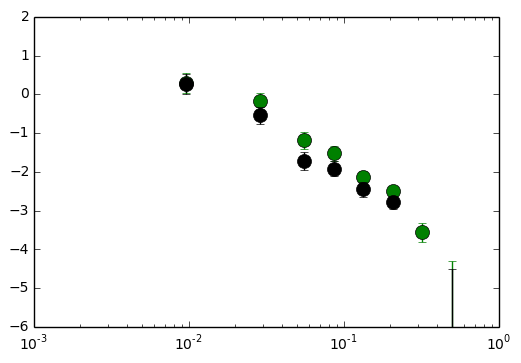

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 2.077e+05 1.197e+01 inf -- 3.072e+02 -- -0.0167957 -0.659991 -1.75733 -2.01992 -2.58869 -2.93933 -6.08072 -8.3 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 3.271e+03 1.431e+01 2.187e+00 -- 3.094e+02 -- 0.0139188 -0.616992 -1.71242 -1.98591 -2.55782 -2.91741 -5.78072 -8 0.0404571 0.0959238 0.114705 0.117637 0.0759046 0.11315 2.83682 -2.97794
   5 3.402e+03 1.686e+01 2.074e+00 -- 3.115e+02 -- 0.0411101 -0.582169 -1.67612 -1.95765 -2.53188 -2.89876 -6.08072 -8 -0.00584518 0.0932078 0.124735 0.131247 0.0572905 0.124022 1.45283 -3.03469
   7 3.420e+03 1.966e+01 1.889e+00 -- 3.134e+02 -- 0.0650135 -0.553404 -1.64618 -1.93385 -2.50984 -2.88274 -5.78072 -8 -0.0424699 0.0913679 0.131869 0.14207 0.0426621 0.133189 -0.940465 1.19045
   9 2.868e+03 2.272e+01 1.819e+00 -- 3.152e+02 -- 0.0859844 -0.529292 -1.62113 -1.91359 -2.49094 -2.8689 -6.08072 -7.7 -0.0718915 0.0901134 0.137101 0.15086 0.0309294 0.141054 0.754261 2.5184
  11 5.181e+03 2.608e+01 1.679e+00 -- 3.169e+02 -- 0.104393 -0.508851 -1.59992

In [14]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

<Container object of 3 artists>

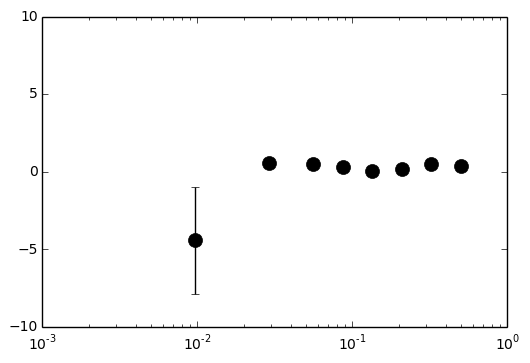

In [15]:


xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10, color="black")



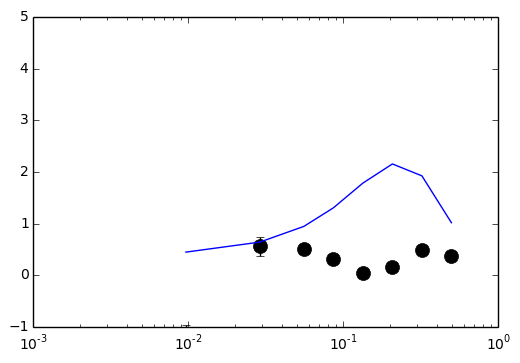

In [18]:
s, loc, scale = lognorm.fit(lag,loc=.01)

xscale('log'); ylim(-1,5)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")
plot(fqd,lognorm.pdf(fqd,s,loc,scale))